In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('../..')
from scripts import functions as fn

# **Explanatory Data Analysis**

## Initial Results

In [2]:
fn.wrangle("../../data/raw/mlb_elo_latest_updated.csv").shape

(1713, 22)

This shows that there are 1713 games in this dataset from the current season with results

In [3]:
fn.initial_correct("../../data/raw/mlb_elo_latest_updated.csv").shape

(993, 24)

Based on just team ratings, the system has correctly predicted 993 games (57.9%)

In [4]:
fn.pitcher_correct("../../data/raw/mlb_elo_latest_updated.csv").shape

(988, 22)

Based on team ratings as well as the adjusted score for the starting pitcher, the system has correctly predicted 988 games (57.6%)

In [5]:
fn.only_pitcher("../../data/raw/mlb_elo_latest_updated.csv").shape

(940, 22)

If you guessed who would win simply on who has the better starting pitcher, you would correctly pick 940 games (54.9%)

From the info above, we can see that over the course of almost 2000 games, the predictions aren't as strong as many would think. While accounting for the starting pitcher actually performed slightly worse, we can see on the other occasion that picking the team simply based on the better starting pitcher gives a noticable disadvantage. This answers my initial question on how much the pitcher influences the outcome as it turns out there is much less influence that I had originally thought. This may make a large difference if there is a large gap in the two pitchers, however most of the time it is not the best way to determine the outcome of a game.


#### **What's the average odds of the favourite to win?**

In [6]:
df = fn.wrangle("../../data/raw/mlb_elo_latest_updated.csv")
temp_1 = (df.loc[((df['rating_prob1'] > df['rating_prob2']))])['rating_prob1']
temp_2 = (df.loc[((df['rating_prob1'] < df['rating_prob2']))])['rating_prob2']
full = pd.concat([temp_1, temp_2])
x = sum(full) / len(full)
print(f"{round(x*100, 2)}%")

57.7%


Because the odds of the favourite to win (57.7%) and the correct predictions (57.6%) are so incredibly close, this means that the system is very good at computing accuracte odds for each team to come out on top.

## How Do Ratings Change Throughout the Year?

### **AL East**

In [11]:
bluejays = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "TOR")
redsox = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "BOS")
rays = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "TBD")
yankees = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "NYY")
orioles = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "BAL")
al_east= pd.concat([bluejays, yankees, redsox, rays, orioles])

In [12]:
plt.figure(figsize=(20,30))
sns.set(rc = {'figure.figsize':(15,8)})

<Figure size 1440x2160 with 0 Axes>

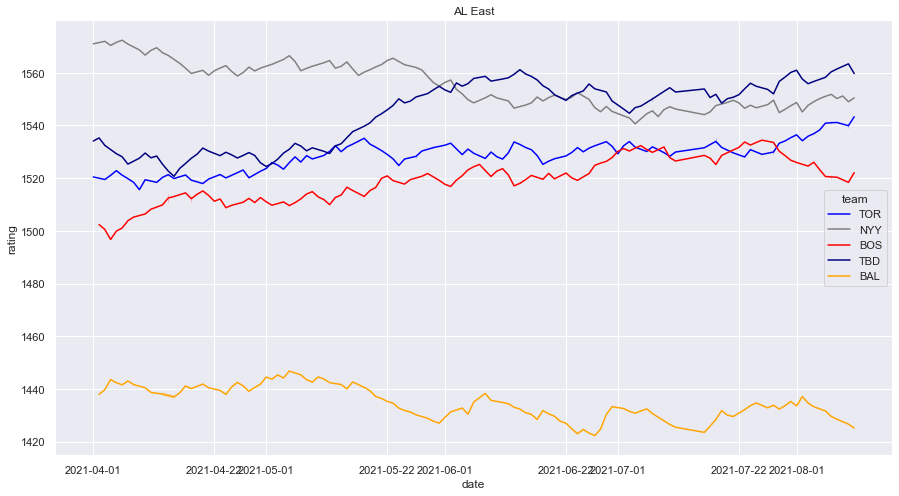

In [58]:
plt.title('AL East')
sns.lineplot(data=al_east, x = 'date', y = 'rating', hue = 'team', palette = {'TOR':'blue', 'NYY':'grey', 'BOS':'red', 'BAL':'orange', 'TBD':'navy'})
plt.savefig('../../images/AL_East.jpg')

The AL East is known as the best division in baseball and this plot backs that up. Four of the five teams have very strong ratings and are all very close in power. This shows how much Baltimore is the outlier in this division.

### **AL Central**

In [14]:
whitesox = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "CHW")
twins = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "MIN")
tigers = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "DET")
royals = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "KCR")
indians = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "CLE")
al_central= pd.concat([whitesox, twins, tigers, royals, indians])

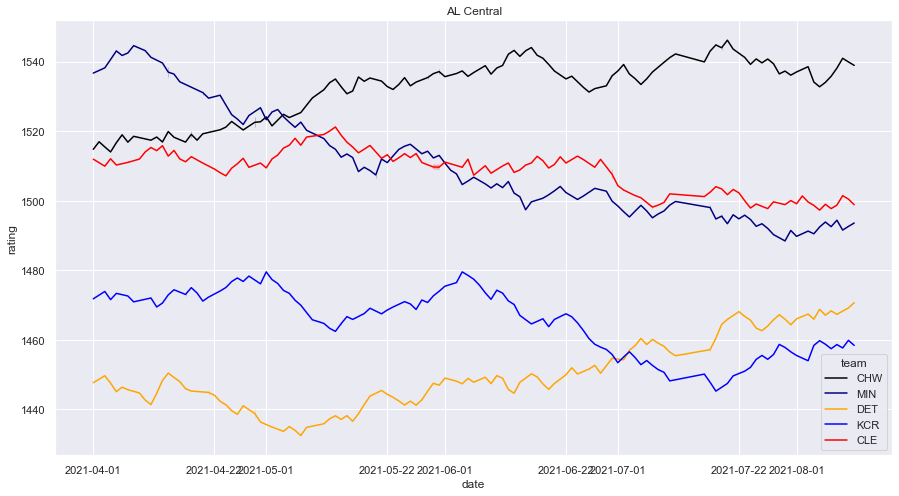

In [57]:
plt.title('AL Central')
fig = sns.lineplot(data=al_central, x = 'date', y = 'rating', hue = 'team', palette = {'CHW':'black', 'MIN':'navy', 'DET':'orange', 'KCR':'blue', 'CLE':'red'})
plt.savefig('../../images/AL_Central.jpg')

For the AL Central, this shows how difficult sports predictions can be. The Minnisota Twins had a very strong roster to start the year and are shown here to be the favourites to win the division but had a very poor start to the year and never rebounded. Although they have one of the best rosters, they have played very poorly resulting in a large drop of rating.

### **AL West**

In [16]:
astros = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "HOU")
angels = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "ANA")
mariners = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "SEA")
athletics = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "OAK")
rangers = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "TEX")
al_west= pd.concat([astros, angels, mariners, athletics, rangers])

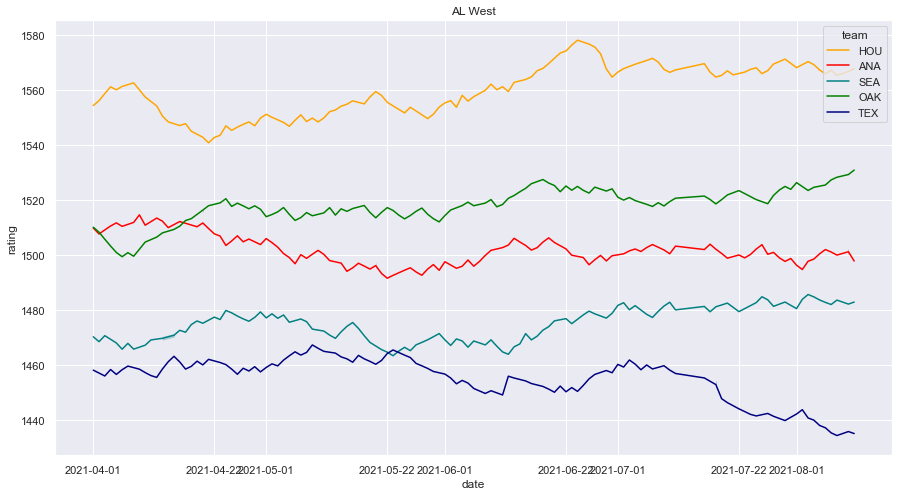

In [59]:
plt.title('AL West')
sns.lineplot(data=al_west, x = 'date', y = 'rating', hue = 'team', palette = {'HOU':'orange', 'ANA':'red', 'SEA':'teal', 'OAK':'green', 'TEX':'navy'})
plt.savefig('../../images/AL_West.jpg')

This plot shows how impressive the system has been with its pre-season predictions. All teams have very similar ratings compared to where they began

### **NL East**

In [18]:
mets = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "NYM")
braves = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "ATL")
marlins = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "FLA")
phillies = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "PHI")
nationals = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "WSN")
nl_east= pd.concat([mets, braves, marlins, phillies, nationals])

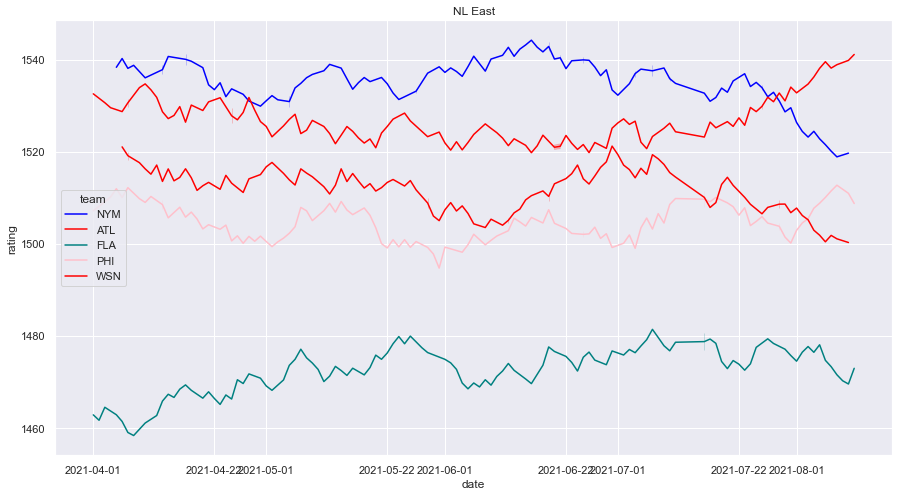

In [60]:
plt.title('NL East')
sns.lineplot(data=nl_east, x = 'date', y = 'rating', hue = 'team', palette = {'NYM':'blue', 'ATL':'red', 'FLA':'teal', 'PHI':'pink', 'WSN':'red'})
plt.savefig('../../images/NL_East.jpg')

This plot shows that for this division, the pre-season ratings were very accurate, however recently, although the phillies have played really well lately and are tied for first place with the braves. Even though the phillies mets and braves are neck and neck, their ratings are not very close.

### **NL Central**

In [20]:
brewers = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "MIL")
reds = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "CIN")
cardinals = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "STL")
cubs = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "CHC")
pirates = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "PIT")
nl_central= pd.concat([brewers, reds, cardinals, cubs, pirates])

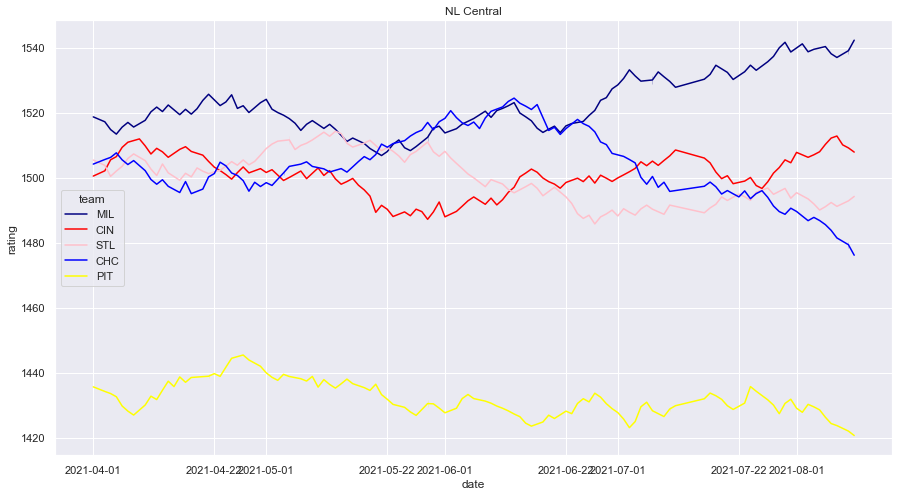

In [61]:
plt.title('NL Central')
sns.lineplot(data=nl_central, x = 'date', y = 'rating', hue = 'team', palette = {'MIL':'navy', 'CIN':'red', 'STL':'pink', 'CHC':'blue', 'PIT':'yellow'})
plt.savefig('../../images/NL_Central.jpg')

This plot looks like a typical year where there are many teams in the running to begin the year and then their level of play determines how their ratings change. One big thing to not is the Chicago Cubs, who traded away all their star players later in the year, thus having their ratings drop very quickly.

### **NL West**

In [22]:
dodgers = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "LAD")
padres = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "SDP")
giants = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "SFG")
dbacks = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "ARI")
rockies = fn.find_team("../../data/raw/mlb_elo_latest_updated.csv", "COL")
nl_west= pd.concat([dodgers, padres, giants, dbacks, rockies])

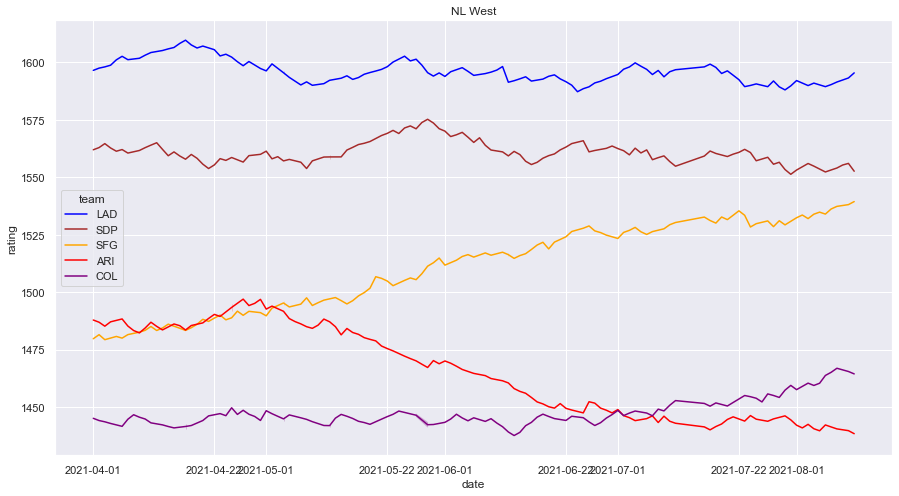

In [62]:
plt.title('NL West')
sns.lineplot(data=nl_west, x = 'date', y = 'rating', hue = 'team', palette = {'LAD':'blue', 'SDP':'brown', 'SFG':'orange', 'ARI':'red', 'COL':'purple'})
plt.savefig('../../images/NL_West.jpg')

This plot is the most interesting as to how much a teams record influences their rating, vs how the teams players determine the rating. The initial ratings seem in line, however the San Francisco Giants have had the best record the entire year while being the underdog. Although the dodger roster is much stronger, I would've expected the giants to have a much better rating given their strong season. On the other end, the struggling dodgers have kept almost the same rating they started the year with.

### **All of MLB**

In [26]:
mlb = pd.concat([al_east, al_central, al_west, nl_east, nl_central, nl_west])

In [33]:
#sns.lineplot(data=mlb, x = 'date', y = 'rating', hue = 'team', palette = {'LAD':'blue', 'SDP':'brown', 'SFG':'orange', 'ARI':'red', 'COL':'purple', 'MIL':'navy', 'CIN':'red', 'STL':'pink', 'CHC':'blue', 'PIT':'yellow', 'NYM':'blue', 'ATL':'red', 'FLA':'teal', 'PHI':'pink', 'WSN':'red', 'HOU':'orange', 'ANA':'red', 'SEA':'teal', 'OAK':'green', 'TEX':'navy', 'CHW':'black', 'MIN':'navy', 'DET':'orange', 'KCR':'blue', 'CLE':'red', 'TOR':'blue', 'NYY':'grey', 'BOS':'red', 'BAL':'orange', 'TBD':'navy'})

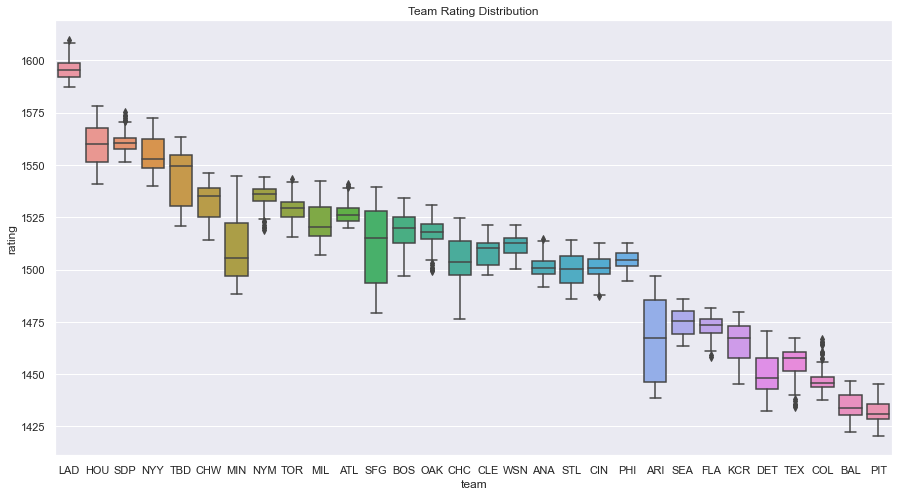

In [63]:
mlb = mlb.sort_values(by=['rating'], ascending = False)
plt.title('Team Rating Distribution')
sns.boxplot(data=mlb, x = 'team', y = 'rating')
plt.savefig('../../images/MLB_Distribution.jpg')

This boxplot is great for seeing which teams have dramatically changed their rating throughout the year, as well as teams who havent. For instance, right away we can see ARI has dropped their rating substantially where as LAD has kept their high rating throughout the year.

In [22]:
#mlb.to_csv('ratings_updated.csv')

In [39]:
daily_correct = fn.correct("../../data/raw/mlb_elo_latest_updated.csv")

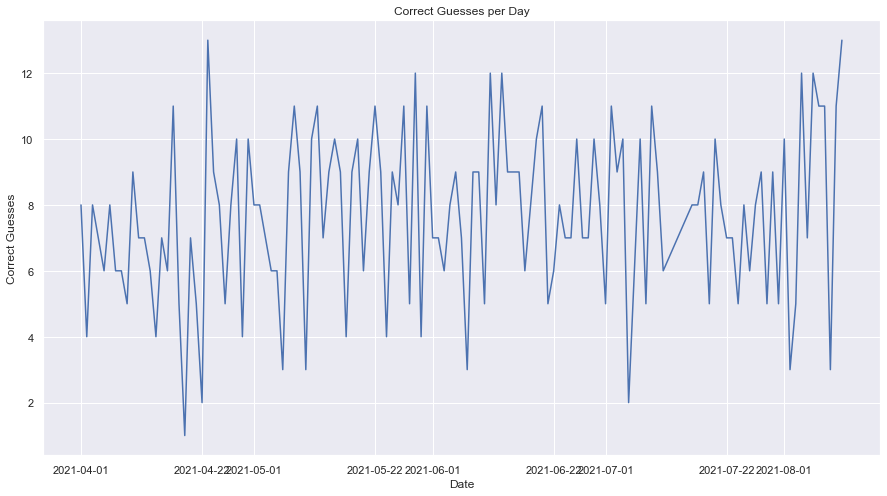

In [64]:
plt.title('Correct Guesses per Day')
sns.lineplot(data=daily_correct, x = 'Date', y = 'Correct Guesses')
plt.savefig('../../images/GuessesPerDay.jpg')

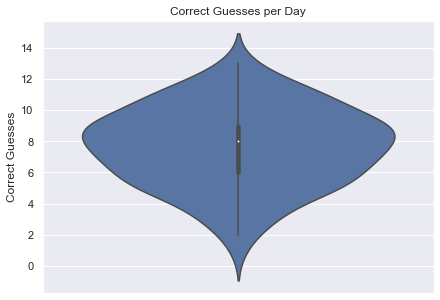

In [66]:
plt.figure(figsize=(7,5))
plt.title('Correct Guesses per Day')
sns.violinplot(data=daily_correct, y = 'Correct Guesses')
plt.savefig('../../images/Daily_Violin.jpg')

The violin plot above shows a very standard distribution for corrcet guesses per day. This means the predictions are overall pretty consistent, although they are far from perfect at the same time.

In [25]:
#daily_correct.to_csv('daily_correct.csv')

In [6]:
kershaw = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Clayton Kershaw")
buehler = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Walker Buehler")
woodruff = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Brandon Woodruff")
burnes = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Corbin Burnes")
lynn = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Lance Lynn")
peralta = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Freddy Peralta")
gausman = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Kevin Gausman")
wheeler = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Zack Wheeler")
scherzer = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Max Scherzer")
stroman = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Marcus Stroman")
musgrove = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Joe Musgrove")
ray = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Robbie Ray")
ryu = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Hyun Jin Ryu")
degrom = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Jacob deGrom")
cole = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Gerrit Cole")
rodon = fn.find_pitcher("../../data/raw/mlb_elo_latest_updated.csv", "Carlos Rodon")

In [49]:
pitchers = [kershaw, buehler, woodruff, burnes, lynn, peralta, gausman, wheeler, scherzer, stroman, musgrove, ray, ryu, degrom, cole, rodon]
pitching = pd.concat(pitchers)
#pitching.to_csv('pitching.csv')

### **Top Rated Pitchers in the MLB**

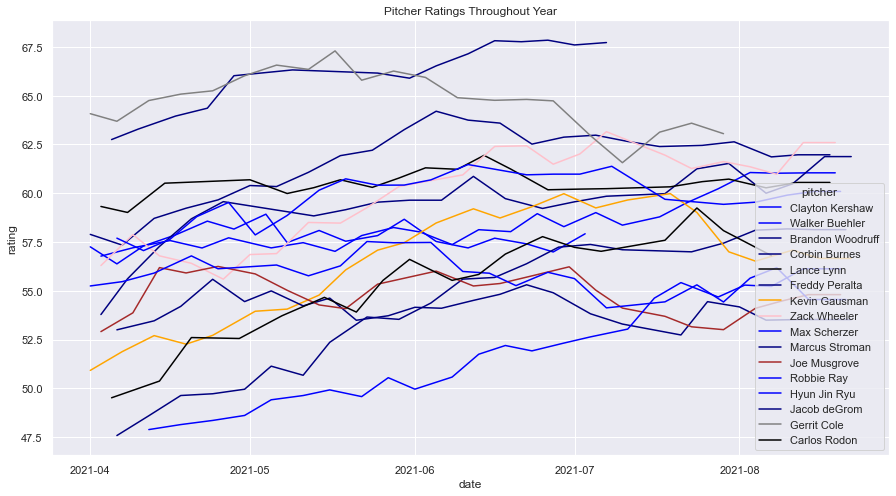

In [67]:
plt.title('Pitcher Ratings Throughout Year')
sns.lineplot(data=pitching, x = 'date', y = 'rating', hue = 'pitcher', palette = {'Clayton Kershaw':'blue', 'Walker Buehler':'blue', 'Brandon Woodruff':'navy', 'Corbin Burnes':'navy', 'Lance Lynn':'black', 'Freddy Peralta':'navy', 'Kevin Gausman':'orange', 'Zack Wheeler':'pink', 'Max Scherzer':'blue', 'Marcus Stroman':'navy', 'Joe Musgrove':'brown', 'Robbie Ray':'blue', 'Hyun Jin Ryu':'blue', 'Jacob deGrom':'navy', 'Gerrit Cole':'grey', 'Carlos Rodon':'black'})
plt.savefig('../../images/Pitcher_Ratings.jpg')

Plotted above is the ratings for some of the top pitchers in the league, plotted with date, showing how their ratings change throughout the season. I was very surprised by this plot in how little many of the ratings changed throughout the year. With the execption of a few players, many have had almost no rating change depending on how they've pitched this year

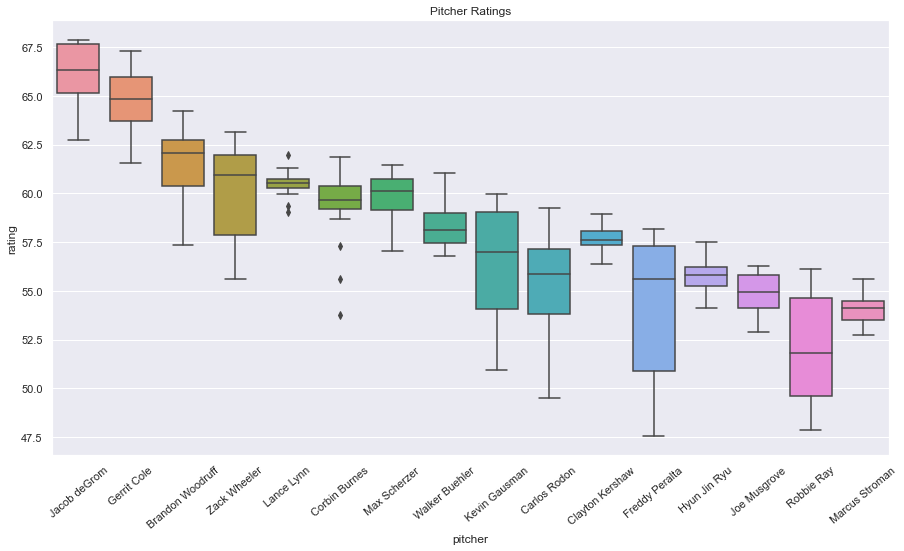

In [68]:
plt.xticks(rotation = 40)
plt.title('Pitcher Ratings')
pitching = pitching.sort_values(by=['rating'], ascending = False)
sns.boxplot(data=pitching, x = 'pitcher', y='rating')
plt.savefig('../../images/Pitcher_Distribution.jpg')

Plotted above is the ratings for some of the top pitchers in the league, plotted with date, showing how their ratings change throughout the season. On top I alos used a box plot to check the distribution of their ratings. I was very surprised by this plot in how little many of the ratings changed throughout the year. With the execption of a few players, many have had almost no rating change depending on how they've pitched this year. Almost every pitcher has stayed within a 2.5 point range. The larger the box, the more the pitcher performed differntly than expected

## Conclusions

#### **How do Ratings Change Throughout a Year?**

After plotting many of the teams ratings thus far into the season, I was surprised at what I saw for many teams. For example, the San Francisco Giants came into the year as a lower level team but then stunned everyone by having the best record in the league. This led me to believe they should have one of the highest ratings, even if they don't have the best team. Instead, they are much lower than many teams who they have consistently beat. On the other hand, the Dodgers were expected to be a very strong powerhouse but have not played to those standards so far. Although their record isn't as strong as expected, they maintain the best ranking in the league by far.

#### **How do Starting Pitchers Change the Odds and Outcomes?**

Similary to team ratings, I found that it was hard for a starting pitcher to greatly change his ratings based on performance. On the winning odds side of things, I was very interested to see how different predictions are based ont he pitcher, as well as how well you could predict games simply by the pitcher. While basic team ratings were 57.9% correct, predictions after the pitcher adjustment were 57.6% correct. This means that over the long run, the pitchers don't make as large of a difference as I expected. On the other hand, if you simply chose the team with the better starting pitcher, you would be 54.9% correct, a noticeable drop off from the initial values.